Tutorial 1. Constructing and analyzing a social network: Twitter retweet and reply data
==============================================================

1.1 Importing and visualizing a social network dataset into a Python graph
---

This exercise assumes you have Python and the corresponding NetworkX package installed, if not, 
go back to [installation instructions](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/install-instructions.ipynb).
This rest of this tutorial will guide you through a hand-on construction of a graph representation of a social network. 


**Step 1: A real-life dataset.**
The data you will be manipulating is issued from a real-life crawl of Twitter posts containing references to [a particular Youtube video](https://www.youtube.com/watch?v=iS1g8G_njx8).
The tweets were collected during a short period in July 2014.
You can either [download the **CSV file**](http://rizoiu.eu/sna-lab-ipython/dataset.csv) (Comma Separated Values) into your local folder and load it from there, or you can use it directly from the specified URL using the `urllib2` library.

**Step 2: Load and examine the social network dataset.**

* Start an iPython notebook in the same directory, by typing "ipython notebook".
* Next, we are going to load the aforementioned dataset into NetworkX graph representing the social network. In this social graph, each node represents a Twitter user. Each line of the dataset contains two values (node labels) separated by a comma, signifying that there is an arc between the two nodes. The meaning of an arc is that the second user either retweeted or replied to a tweet of the first user.

In [5]:
# necessary imports
import csv
import urllib2
import networkx as nx

# opening a local CSV file
to_read = file("./dataset.csv")  #use this line for a locally downloaded file
# or reading it directly from the specified URL
# url = 'http://rizoiu.eu/sna-lab-ipython/dataset.csv'
# to_read = urllib2.urlopen(url)
reader = csv.reader(to_read)

#  construct the networkx graph
G = nx.Graph()
for line in reader:
    if line[0] not in G:  G.add_node(line[0])
    if line[1] not in G:  G.add_node(line[1])
    G.add_edge(line[0], line[1])

**Step 3: Visualizing the resulted social graph.**

IPython works with the [Matplotlib](http://matplotlib.org/) plotting library, which integrates Matplotlib with IPython's display system and event loop handling.
To make plots using Matplotlib, you must first enable IPython's matplotlib mode.
To do this, run the `%matplotlib` magic command to enable plotting in the current Notebook.
This magic takes an optional argument that specifies which Matplotlib backend should be used.  Most of the time, in the Notebook, you will want to use the `inline` backend, which will embed plots inside the Notebook:

**OBSERVATION**: the `%matplotlib` magic command does not work with the old version of iPython Notebook installed on the ANU's lab computers. 
Please ignore the following cell if you are working on one of these computers.
Starting notebook with "`ipython notebook --pylab=inline`", as shown in [the installation instructions](http://nbviewer.ipython.org/url/rizoiu.eu/sna-lab-ipython/install-instructions.ipynb), achieves the same effect.

In [2]:
%matplotlib inline

Next, we will plot the resulted graph, using the a spring layout.

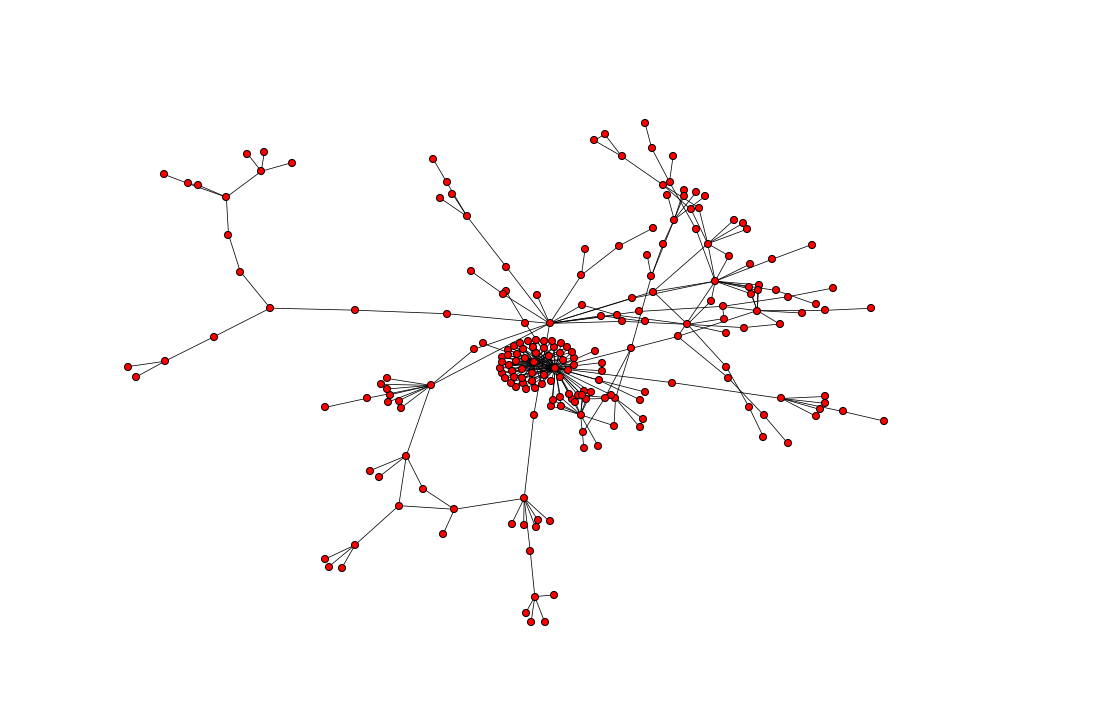

In [109]:
import matplotlib.pyplot as plt

# determine the spring layout
pos = nx.spring_layout(G)

# draw the graph
plt.figure(figsize=(19,12))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, width=0.75, arrows=True)

1.2 Exploring the network: basic metrics, centrality, diameter, radius.
---

Now that we loaded and visualized the graph, lets compute some basic statistics. First of all, how many users do we have in our network?

In [5]:
print "The social graph contains %s users." % len(G)

The social graph contains 217 users.


**#1.1:** Find another way of determining the number of users, by applying a (`networkx`) graph method.  
Similarly, let's see how many relations (edges) are there between our users.

In [7]:
print "The social graph contains %s users." % G.number_of_nodes()

The social graph contains 217 users.


In [6]:
print "The social graph contains %s relations." % G.number_of_edges()

The social graph contains 296 relations.


  
  
Next, we want to know the relations between given users. Does user `'2568857825'` know the users `'1584106808'` and `'2532489048'`? If not, who can introduce them? What is the optimum path that leads one user to the other?

In [8]:
print nx.shortest_path(G, source = '2568857825', target = '1584106808')
print nx.shortest_path(G, source = '2568857825', target = '2532489048')

['2568857825', '1584106808']
['2568857825', '457728637', '85452649', '78598378', '109670729', '291972556', '2260701138', '54837666', '2532489048']


So, it seems that, while `'2568857825'` and `'1584106808'` are direct acquaintances, `'2568857825'` needs a long chain of introductions (7 intermediary users, 8 introductions) to get to `'2532489048'`.
We define an introduction as an interaction between 2 users in a chain, therefore an introduction is an edge on a shortest path between 2 users.  
How many introductions does `'2568857825'` need to reach anyone in the graph? (this means, what is the longest **shortest path** from `2568857825` to anyone in the network).

In [9]:
no_hops = max([len(nx.shortest_path(G, source = '2568857825', target = x)) - 1 for x in G.nodes()])
print "Using %d introductions, '2568857825' can reach anyone in the network" % no_hops

Using 13 introductions, '2568857825' can reach anyone in the network


**#1.2:** What is the minimum number of introductions required for the user `'137056623'` to reach any other user?  
**#1.3:** What is the minimum number of introductions required for the any user to reach any other user in the  network?  
**HINT:** study the `shortest_path_length` method description and compute the shortest distances between all pairs of nodes as shown previously (*e.g.*, when calculating `no_hops`).

In [7]:
no_hops = max([len(nx.shortest_path(G, source = '137056623', target = x)) - 1 for x in G.nodes()])
print "Using %d introductions, '137056623' can reach anyone in the network" % no_hops

Using 10 introductions, '137056623' can reach anyone in the network


In [14]:
no_hops = max (max([len(nx.shortest_path(G, source = y, target = x)) - 1 for x in G.nodes()]) for y in G.nodes())
print "Using %d introductions, anyone can reach anyone in the network" % no_hops

Using 18 introductions, anyone can reach anyone in the network


The key concepts in the next exercises are __Eccentricity, Diameter and Radius__, which are based on the notion of *shortest distance* that we have just seen here above.

Let $d(u,v)$ be the shortest distance, or graph geodesic, between two nodes $u$ and $v$. 

The _eccentricity_ $\epsilon(v)$ of a node $v$ is the greatest geodesic distance between $v$ and any other node. *i.e.*, $\max_{u \neq v} d(u,v)$.  
It can be thought of as how far a node is from the node most distant from it in the graph [wikipedia](http://en.wikipedia.org/wiki/Distance_%28graph_theory%29).

`Networkx` provides a very convenient method of computing the *eccentricity* of nodes in our social network:

In [8]:
ec = nx.eccentricity(G)
print ec

{'2568857825': 13, '218342185': 11, '984586015': 11, '2532489048': 13, '634964760': 13, '2570186883': 13, '1895195947': 14, '273216391': 13, '2513030970': 13, '477534590': 13, '86827273': 11, '109670729': 9, '2567515295': 15, '78598378': 10, '2438593561': 15, '180502452': 11, '2304891050': 14, '121811715': 16, '230421055': 10, '436229017': 18, '2324917405': 16, '2443017820': 12, '2381587875': 13, '221379912': 12, '2260701138': 11, '277180205': 18, '2518865954': 15, '303291881': 18, '54837666': 12, '270957052': 15, '2231764297': 11, '271475828': 17, '2531272770': 13, '849520898': 12, '19405774': 13, '534122115': 13, '91274231': 13, '2269421607': 12, '112878476': 10, '862277491': 13, '1715125316': 14, '79963913': 18, '914854934': 15, '2569426702': 13, '553613442': 14, '154519365': 11, '2299265379': 13, '14423603': 13, '82243231': 13, '2301616502': 13, '100220864': 14, '2168415412': 13, '155999283': 14, '41397576': 13, '925042686': 14, '2506305612': 13, '2531194285': 13, '157883615': 13, 

So let's find out which seems the most central user in our network (the user with the lowest *eccentricity*). Note that, if there are multiple users with the same cetrality, this will output only one of them.

In [16]:
import operator

ec = nx.eccentricity(G)
print "The most eccentricity-wise central user is '%s'" % min(ec.iteritems(), key=operator.itemgetter(1))[0]

The most eccentricity-wise central user is '109670729'


The _radius_ $r$ of a graph is the minimum eccentricity of any node, $r = \min_{v} \epsilon(v)$. It can be computed as:

In [82]:
print min(ec.values())
## OR 
print nx.radius(G)

9
9


**#1.4:** The _diameter_ $d$ of a graph is the maximum eccentricity of any node, $d = \max_{v} \epsilon(v)$. Give two ways to compute the diameter of the social network G (one using the calculated eccentricity values calculated earlier and another one using the dedicated `networkx` function).

In [83]:
print max(ec.values())
## OR 
print nx.diameter(G)

18
18


Recall that the betweenness centrality of a _node_ $v$ is defined as:
$$c_B(v)=\sum_{s,t \in V} \frac{\sigma(s,t|v)}{\sigma(s,t)} $$
Now define the betweenness centrality of an _edge_ $e$ as 
$$c_B(e)=\sum_{s,t \in V} \frac{\sigma(s,t|e)}{\sigma(s,t)} $$
here $V$ is the set of nodes in an undirected graph, $\sigma(s, t)$ is the number of shortest paths between node s and node t, $\sigma(s, t|v)$ is the number of those paths passing through node v, and $\sigma(s, t|e)$ is the number of those paths passing through _edge_ $e$.

**#1.5:** Determine ALL most central node(s) and ALL most central edge(s), with respect to the node and edge betweenes centrality. Remember that two or more nodes/edges may have the same centrality score and they ALL need to be determined for this assignment.  
**Hint:** `networkx` already contains dedicated function to compute node and edge betweenness centrality scores.

In [10]:
import operator

print "The most betweenness central users:",
bc = nx.betweenness_centrality(G)
# the greatest centrality value
max_node_centrality = max(bc.iteritems(), key=operator.itemgetter(1))[1]

kv_pairs = [(a,b) for (a,b) in bc.iteritems()]
for kv in kv_pairs:
    if kv[1] == max_node_centrality:
        print "'"+str(kv[0])+"'",
print

print "The most betweenness central edges:",
ebc = nx.edge_betweenness_centrality(G)
# the greatest centrality value
max_edge_centrality = max(ebc.iteritems(), key = operator.itemgetter(1))[1]

kv_pairs = [(a,b) for (a,b) in ebc.iteritems()]
for kv in kv_pairs:
    if kv[1] == max_edge_centrality:
        print "'"+str(kv[0])+"'",
print

 The most betweenness central users: '54837666'
The most betweenness central edges: '('2260701138', '54837666')'
